# Introduction
Welcome to the analysis of the Brazilian e-commerce dataset from Olist Store. This project aims to test several hypotheses to determine their statistical significance in relation to the broader population. By examining various aspects of the dataset, we hope to uncover insights that can benefit sellers on the e-commerce platform.

## Hypotheses

1. Influence of Payment Methods on Purchase Frequency:<br>
<br>
    - We hypothesize that certain payment methods are preferred by customers and lead to higher purchase frequency. Sellers can offer and promote these preferred payment methods to increase sales.<br>
<br>
2. Effect of Product Reviews on Sales:<br>
<br>
    - We hypothesize that products with higher review ratings have higher sales. Sellers can focus on improving product quality and encouraging satisfied customers to leave positive reviews to boost sales.<br>
<br>
3. Customer Loyalty and Repurchase Rates:<br>
<br>
   - We hypothesize that customers who leave positive reviews are more likely to make repeat purchases. Sellers can implement loyalty programs and follow-up strategies to encourage repeat business from satisfied customers.


# About the dataset

The dataset can be found on kaggle [click here to view dataset in kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

This dataset contains public information on orders made at Olist Store, a Brazilian e-commerce platform. It includes details of 100,000 orders from 2016 to 2018 across various marketplaces in Brazil.

While this dataset offers a comprehensive view of sales during that period, it does not cover the entire population of all possible sales data. Therefore, it is considered a **sample dataset**.

**Hypothesis testing** is essentially a method to determine if the observations from a sample can be generalized to the broader population. It helps to assess whether the patterns or effects seen in the sample data are likely to be true for the entire population or if they could have occurred by random chance.


  
### Accessing the data
The dataset consists of 8 csv files. I've imported these files into [DB Browser for SQLite](https://sqlitebrowser.org/) to query the data needed for each step and upload the files into my github repository to  be used in jupyter notebooks.

Please refer to the data schema below:

<div style="text-align: center;">
  <img src=https://i.imgur.com/HRhd2Y0.pngL" alt=Schemat" width=6300" height=5200" style="margin-left: 20px;">
</div>


## For our first hypothesis:
Influence of Payment Methods on Purchase Frequency:

- We hypothesize that certain payment methods are preferred by customers and lead to higher purchase frequency. Sellers can offer and promote these preferred payment methods to increase sales.

#### Data required:
##### from the olist_order_payments_dataset table:
 - order_id - unique identifier of an order.<br>
- payment_type - method of payment chosen by the customer.<br>
##### from the olist_order_customer_dataset table:
- customer_id - key to the orders dataset. Each order has a unique customer_id.<br>
- customer_unique_id - unique identifier of a customer.<br>
- customer_zip_code_prefix - first five digits of customer zip code<br>
- customer_city - customer city name<br>
- customer_state - customer state<br>
##### from the olist_orders_dataset table:
- customer_id - key to the customer dataset. Each order has a unique customer_id.<br>
- order_id - unique identifier of the order.
***
  
```sql
SELECT c.customer_unique_id, c.customer_id, o.order_id, p.payment_type, c.customer_zip_code_prefix,
       c.customer_city, c.customer_state
  FROM olist_customers_dataset as c
  LEFT JOIN olist_orders_dataset as o
    ON c.customer_id = o.customer_id
  LEFT JOIN olist_order_payments_dataset as p
    ON p.order_id = o.order_id
 lIMIT 5;
```
***

**Preview of the first 5 rows:**
<table>
  <thead>
    <tr>
      <th>customer_unique_id</th>
      <th>customer_id</th>
      <th>order_id</th>
      <th>payment_type</th>
      <th>customer_zip_code_prefix</th>
      <th>customer_city</th>
      <th>customer_state</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>861eff4711a542e4b93843c6dd7febb0</td>
      <td>06b8999e2fba1a1fbc88172c00ba8bc7</td>
      <td>00e7ee1b050b8499577073aeb2a297a1</td>
      <td>credit_card</td>
      <td>14409</td>
      <td>franca</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>290c77bc529b7ac935b93aa66c333dc3</td>
      <td>18955e83d337fd6b2def6b18a428ac77</td>
      <td>29150127e6685892b6eab3eec79f59c7</td>
      <td>credit_card</td>
      <td>9790</td>
      <td>sao bernardo do campo</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>060e732b5b29e8181a18229c7b0b2b5e</td>
      <td>4e7b3e00288586ebd08712fdd0374a03</td>
      <td>b2059ed67ce144a36e2aa97d2c9e9ad2</td>
      <td>credit_card</td>
      <td>1151</td>
      <td>sao paulo</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>259dac757896d24d7702b9acbbff3f3c</td>
      <td>b2b6027bc5c5109e529d4dc6358b12c3</td>
      <td>951670f92359f4fe4a63112aa7306eba</td>
      <td>credit_card</td>
      <td>8775</td>
      <td>mogi das cruzes</td>
      <td>SP</td>
    </tr>
    <tr>
      <td>345ecd01c38d18a9036ed96c73b8d066</td>
      <td>4f2d8ab171c80ec8364f7c12e35b23ad</td>
      <td>6b7d50bd145f6fc7f33cebabd7e49d0f</td>
      <td>credit_card</td>
      <td>13056</td>
      <td>campinas</td>
      <td>SP</td>
    </tr>
  </tbody>
</table>


```sql
CREATE TABLE olis_data AS
SELECT c.customer_unique_id, c.customer_id, o.order_id, p.payment_type, c.customer_zip_code_prefix, c.customer_city, c.customer_state
  FROM olist_customers_dataset as c
  LEFT JOIN olist_orders_dataset as o
    ON c.customer_id = o.customer_id
  LEFT JOIN olist_order_payments_dataset as p
    ON p.order_id = o.order_id
```
Created a new table using the above query then exported it as a csv file.
the csv file is uploaded into my github repository to be used in jupyter notebook as a dataframe for our analysis.

In [2]:
import pandas as pd
olist_data = pd.read_csv("https://raw.githubusercontent.com/Mpakong/Marcel_Peter_Kong_Portfolio/refs/heads/main/projects/Brazilian%20E-Commerce%20Public%20Dataset%20by%20Olist%20(kaggle)/olis_data.csv")
olist_data.head()

,customer_unique_id,customer_id,order_id,payment_type,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,credit_card,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,credit_card,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,credit_card,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,credit_card,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,credit_card,13056,campinas,SP


In [3]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_unique_id        103887 non-null  object
 1   customer_id               103887 non-null  object
 2   order_id                  103887 non-null  object
 3   payment_type              103886 non-null  object
 4   customer_zip_code_prefix  103887 non-null  int64 
 5   customer_city             103887 non-null  object
 6   customer_state            103887 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.5+ MB


In [12]:
# Define a function to get the mode or a default value
def get_mode_or_default(series):
    mode = series.mode()
    return mode[0] if not mode.empty else 'None'

# Aggregate data by customer_unique_id
aggregated_data = olist_data.groupby('customer_unique_id').agg(
    number_of_orders=('order_id', 'count'),
    most_frequent_payment_type=('payment_type', get_mode_or_default)
).sort_values(ascending=False, by='number_of_orders').reset_index()

print(aggregated_data[0:20])


                  customer_unique_id  number_of_orders  \
0   9a736b248f67d166d2fbb006bcb877c3                33   
1   8af7ac63b2efbcbd88e5b11505e8098a                29   
2   569aa12b73b5f7edeaa6f2a01603e381                26   
3   f9ae226291893fda10af7965268fb7f6                23   
4   2524dcec233c3766f2c2b22f69fd65f4                22   
5   24f12460aad399ba18f4ed2c2fbab65d                19   
6   6fbc7cdadbb522125f4b27ae9dee4060                19   
7   8d50f5eadf50201ccdcedfb9e2ac8455                17   
8   1d2435aa3b858d45c707c9fc25e18779                16   
9   25ba76039a1caff121dfcb0d66e54780                15   
10  c4b224d2c784bae11ae98b6ae9f2454c                15   
11  1bc3d5e384c365c86cf79078f32eb495                14   
12  301d1ce5a76b7e1bc47e5115bf5eb6ba                14   
13  94a19681bf6faa3c6ce3e2df1c2d97cb                14   
14  aae867e923db95a5af878ffec19ebd8c                13   
15  74adf920dbd3d2e6e9f18acd88b2fd41                13   
16  c411c8b6db

In [9]:
payment_types = (olist_data['payment_type'].value_counts(normalize=True)*100).sort_values()
print(payment_types)

payment_type
not_defined     0.002888
debit_card      1.471806
voucher         5.558978
boleto         19.043952
credit_card    73.922376
Name: proportion, dtype: float64


In [24]:
number_of_orders = aggregated_data['number_of_orders'].value_counts()
print(number_of_orders)

number_of_orders
1     90367
2      4801
3       554
4       163
5        68
6        51
7        30
8        14
9        11
11        7
10        6
12        6
13        4
14        3
15        2
19        2
29        1
16        1
17        1
22        1
23        1
26        1
33        1
Name: count, dtype: int64


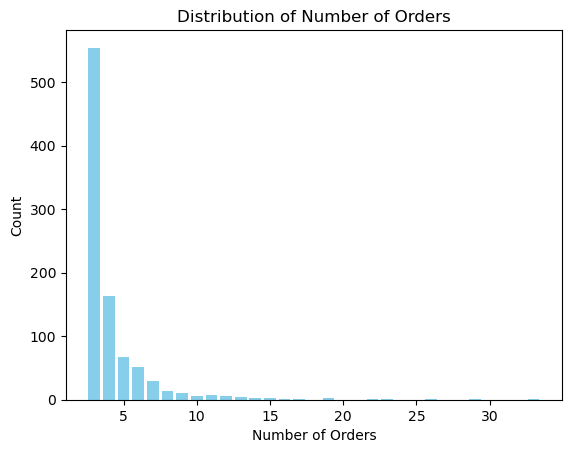

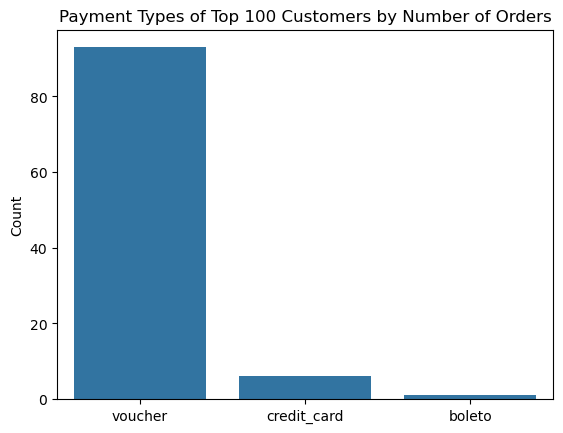

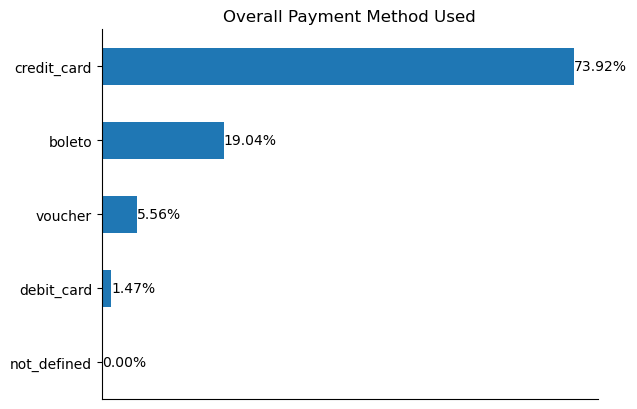

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the value counts of number_of_orders
number_of_orders = aggregated_data['number_of_orders'].value_counts()[2:]

plt.bar(number_of_orders.index, number_of_orders.values, color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Count')
plt.title('Distribution of Number of Orders')
plt.xticks(rotation=360)
plt.show()


# Filter top customers
top_customers = aggregated_data.head(100)
sns.countplot(x='most_frequent_payment_type', data=top_customers, order=top_customers['most_frequent_payment_type'].value_counts().index)
plt.title('Payment Types of Top 100 Customers by Number of Orders')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

ax = payment_types.plot.barh()
for index, value in enumerate(payment_types):
    ax.annotate(f'{value:.2f}%', xy=(value, index), va='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
plt.ylabel('')
plt.title('Overall Payment Method Used')
plt.show()


In [38]:
import scipy.stats as stats

# Identify top 100 customers by number of orders
top_customers = aggregated_data.nlargest(100, 'number_of_orders')

# Create a contingency table
contingency_table = pd.crosstab(top_customers['most_frequent_payment_type'], olist_data['payment_type'])

# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"expected: {expected}")

# Interpret the result
if p < 0.05:
    print("There is a significant association between payment method and order frequency among the top 100 customers.")
else:
    print("There is no significant association between payment method and order frequency among the top 100 customers.")


Chi-Square Statistic: 8.33589349718382
p-value: 0.2145130873504655
Degrees of freedom: 6
expected: [[1.500e-01 7.000e-01 4.000e-02 1.100e-01]
 [9.000e-01 4.200e+00 2.400e-01 6.600e-01]
 [1.395e+01 6.510e+01 3.720e+00 1.023e+01]]
There is no significant association between payment method and order frequency among the top 100 customers.


In [39]:
contingency_table

payment_type,boleto,credit_card,debit_card,voucher
most_frequent_payment_type,,,,
boleto,1,0,0,0
credit_card,0,6,0,0
voucher,14,64,4,11


### Performing a Chi-Square Test of Independence using the scipy.stats.chi2_contingency function.

A contingency table, also known as a cross-tabulation or crosstab, is a type of table used in statistics to display the frequency distribution of variables. It helps to understand the relationship between two categorical variables by showing how the variables interact with each other.

chi2_contingency(contingency_table): This function takes a contingency table as input and performs the Chi-Square Test of Independence. It returns four values:

chi2: The Chi-Square Statistic, which measures the difference between the observed and expected frequencies.

p: The p-value, which indicates the probability that the observed differences are due to chance. A low p-value (typically < 0.05) suggests that the observed differences are statistically significant.

dof: Degrees of freedom, which is a parameter used in the calculation of the Chi-Square Statistic. It is determined by the number of categories in the contingency table.

expected: The expected frequencies, which are the counts you would expect if there were no association between the variables.


### Let's break down the results of your Chi-Square Test of Independence:

Chi-Square Statistic
Value: 8.33589349718382

Interpretation: This value measures the difference between the observed and expected frequencies. A higher value indicates a greater difference.

p-value
Value: 0.2145130873504655

Interpretation: The p-value indicates the probability that the observed differences are due to chance. In this case, the p-value is 0.2145, which is greater than the common significance level of 0.05. This means that the observed differences are not statistically significant.

Degrees of Freedom
Value: 6

Interpretation: Degrees of freedom are calculated based on the number of categories in the contingency table. It helps determine the critical value for the Chi-Square distribution.

Expected Frequencies
Values:

[[1.500e-01 7.000e-01 4.000e-02 1.100e-01]
 [9.000e-01 4.200e+00 2.400e-01 6.600e-01]
 [1.395e+01 6.510e+01 3.720e+00 1.023e+01]]
Interpretation: These are the frequencies you would expect if there were no association between the variables. They are used to calculate the Chi-Square Statistic.

Conclusion
Since the p-value (0.2145) is greater than 0.05, you fail to reject the null hypothesis. This means that there is no significant association between the payment method and the frequency of orders among the top 100 customers. In other words, the preference for vouchers among the top 100 customers is not statistically significant compared to the overall dataset.

## Context of Hypothesis Testing
Hypothesis testing is used to make inferences about a population based on a sample. In your case, the overall dataset represents a sample of transactions from the Olist Store. By comparing the top 100 customers to this sample, we aim to determine if the observed preference for vouchers among these top customers is statistically significant within the context of the sample.

Why Compare to the Overall Dataset?
Representative Sample: The overall dataset is assumed to be a representative sample of the broader population of transactions. By comparing the top 100 customers to this sample, we can infer whether the observed preference for vouchers is likely to be true for the broader population.

Statistical Significance: The Chi-Square Test helps determine if the observed differences in payment methods are statistically significant. If the preference for vouchers among the top 100 customers is significantly different from the overall sample, it suggests that this preference is not due to random chance.

Generalization: The goal is to generalize the findings from the sample to the broader population. If the preference for vouchers is statistically significant in the sample, it is likely to be significant in the broader population as well.

Practical Implications
By comparing the top 100 customers to the overall dataset, you can make data-driven decisions and validate your hypothesis. If the preference for vouchers is significant, you might consider promoting vouchers more aggressively to increase sales among top customers. If not, you might explore other factors that influence customer behavior.

In [32]:
# Calculate the percentage of each state
state_counts = olist_data['customer_state'].value_counts(normalize=True)

# Define your total sample size
total_sample_size = len(olist_data)  # Adjust this based on your needs

# Calculate the sample size for each state
state_sample_sizes = (state_counts * total_sample_size).round().astype(int)
print(state_sample_sizes)


customer_state
SP    43623
RJ    13527
MG    12102
RS     5668
PR     5262
SC     3754
BA     3610
DF     2204
GO     2112
ES     2107
PE     1728
CE     1398
PA     1011
MT      958
MA      767
MS      736
PB      570
PI      524
RN      522
AL      427
SE      361
TO      301
RO      261
AM      154
AC       84
AP       70
RR       46
Name: proportion, dtype: int32
